In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

In [87]:
datas = pd.read_csv("personal_training_data.csv")
datas

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [88]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [89]:
datas.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [90]:
datas.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [91]:
datas.rename(columns = {'Married/Single': 'Marital_Status'},inplace = True)
datas.head()

,Id,Income,Age,Experience,Marital_Status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [92]:
categorical_columns = ['Marital_Status', 'House_Ownership', 'Car_Ownership', 'Profession','Risk_Flag']
for column in categorical_columns:
    print(column , ':-', datas[column].unique())

Marital_Status :- ['single' 'married']
House_Ownership :- ['rented' 'norent_noown' 'owned']
Car_Ownership :- ['no' 'yes']
Profession :- ['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 'Industrial_Engineer' 'Technology_specialist']
Risk_Flag :- [0 1]


In [93]:
datas.corr()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,1.000000,-0.001324,-0.001816,-0.005810,-0.003250,0.001972,0.032153
Income,-0.001324,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.001816,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,-0.005810,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,-0.003250,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,0.001972,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,0.032153,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


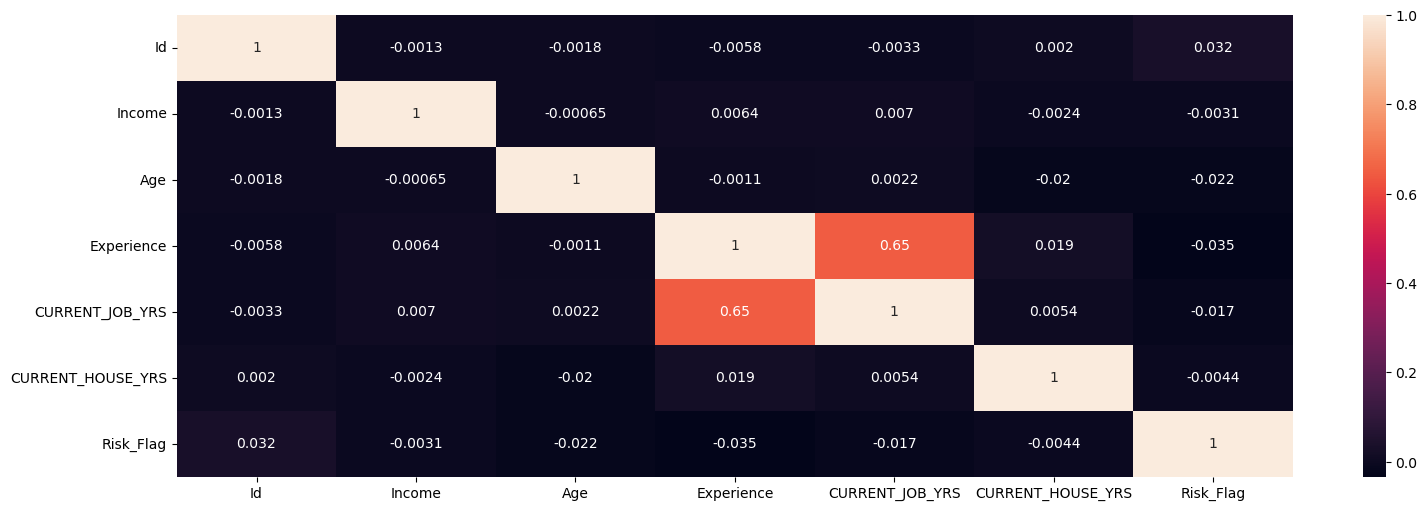

In [94]:
import matplotlib.pyplot as plt
M_correlation = plt.figure(figsize = (18, 6))
sns.heatmap(datas.corr(),annot=True); 

<Figure size 1800x900 with 0 Axes>

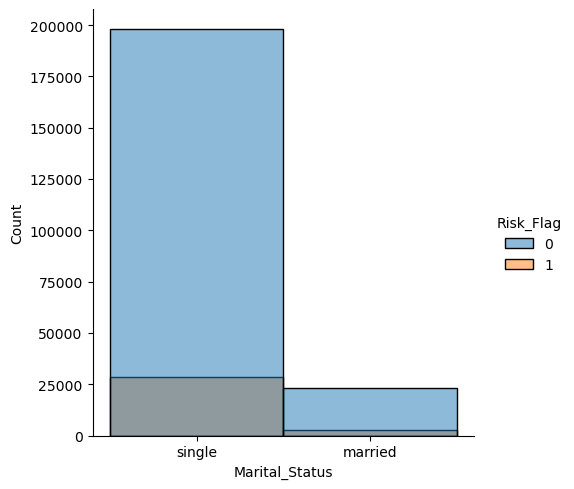

In [95]:
comp = plt.figure(figsize=(18, 9))
sns.displot(data = datas, x= 'Marital_Status', hue='Risk_Flag')

<AxesSubplot:xlabel='House_Ownership', ylabel='count'>

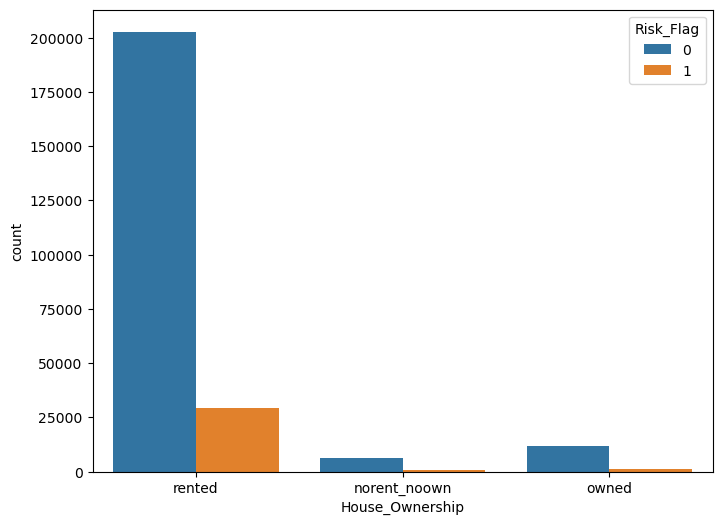

In [96]:
comp1 = plt.figure(figsize=(8, 6))
sns.countplot(data = datas, x= 'House_Ownership', hue='Risk_Flag')

<AxesSubplot:xlabel='Car_Ownership', ylabel='Count'>

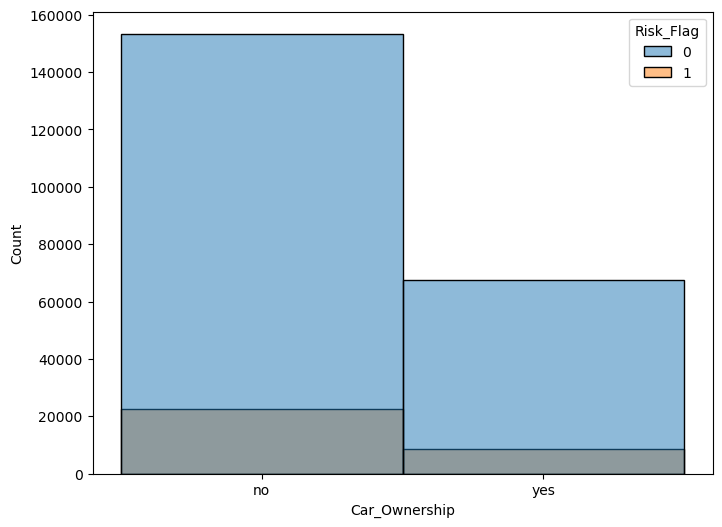

In [97]:
comp2 = plt.figure(figsize=(8, 6))
sns.histplot(data=datas, x='Car_Ownership', hue='Risk_Flag')

In [98]:
df1 = datas.copy(deep=True)
df1

,Id,Income,Age,Experience,Marital_Status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [99]:
data = df1.drop('CITY', axis=1)
 

In [100]:
data = data.drop('Profession', axis=1)

In [101]:
data = data.drop('STATE', axis=1)

In [102]:
data=data.drop('Id',axis=1)

In [103]:
data

,Income,Age,Experience,Marital_Status,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,3,13,0
1,7574516,40,10,single,rented,no,9,13,0
2,3991815,66,4,married,rented,no,4,10,0
3,6256451,41,2,single,rented,yes,2,12,1
4,5768871,47,11,single,rented,no,3,14,1
...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,6,11,0
251996,2843572,26,10,single,rented,no,6,11,0
251997,4522448,46,7,single,rented,no,7,12,0
251998,6507128,45,0,single,rented,no,0,10,0


In [104]:
features = ['Marital_Status','Car_Ownership', 'House_Ownership']
label_encoder = LabelEncoder()

for col in features:
    data[col] = label_encoder.fit_transform(data[col])
data.iloc[25]

Income               1797876
Age                       76
Experience                20
Marital_Status             1
House_Ownership            0
Car_Ownership              0
CURRENT_JOB_YRS           11
CURRENT_HOUSE_YRS         14
Risk_Flag                  0
Name: 25, dtype: int64

In [105]:
X = data.drop(['Risk_Flag'],axis=1)
y = data.Risk_Flag

In [106]:
y.value_counts() 

0    221004
1     30996
Name: Risk_Flag, dtype: int64

In [107]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [108]:
smote = SMOTE(sampling_strategy='minority')
X , y  = smote.fit_resample(X , y)

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [111]:
from sklearn.ensemble import RandomForestClassifier
Tr = RandomForestClassifier(n_estimators= 450, criterion='entropy')
Tr.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=450)

In [112]:
Tr.score(X_test,y_test)

0.9107863321342654

In [113]:
X_train

,Income,Age,Experience,Marital_Status,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
26049,7220808,71,1,1,2,0,1,10
200879,9385960,75,10,1,2,0,3,12
364470,6404098,67,17,0,2,0,5,11
312092,1565345,37,5,1,2,0,4,14
13759,9202245,74,16,1,2,1,13,12
...,...,...,...,...,...,...,...,...
174940,8593318,75,20,1,1,0,7,13
264325,4980725,71,7,1,2,0,5,11
143883,6837661,34,16,1,2,0,12,13
361612,6035837,34,13,1,2,0,11,11


In [114]:
import pickle
with open('personalloan.pkl','wb') as f:
    pickle.dump(Tr,f)

In [115]:
X.columns


Index(['Income', 'Age', 'Experience', 'Marital_Status', 'House_Ownership',
       'Car_Ownership', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'],
      dtype='object')